# Carregando da Hotmart

### Biblioteca Instaladas

In [39]:
#!pip3 install mysql-connector-python

### Bibliotecas utilizadas

In [1]:
import pandas as pd
import numpy as np
import mysql.connector
import mysql.connector as sql
import sqlite3
import seaborn as sns
import plotly.express as px

### Carregando o banco de dados para as análises

In [19]:
conn = mysql.connector.connect(host='interview-2.ck1h5ksgzpiq.us-east-1.rds.amazonaws.com'\
                                        , user='admin', password='0WHPq8U2yJ9JgHVjsRBM', database='innodb')

In [20]:
# # Extraindo o conjunto de dados 
 df =  pd.read_sql("SELECT * FROM sales_data",conn)

C:\Users\CaioBalieiro\anaconda3\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [22]:
df.to_csv('hotmart.csv')

## Análise do conjunto de dados de sales_data

In [3]:
df = pd.read_csv('hotmart.csv')
df.drop(columns = 'Unnamed: 0', inplace =True)

In [6]:
#df.to_parquet('hotmart.parquet')

# Análises descritivas em geral

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1561437 entries, 0 to 1561436
Data columns (total 17 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   purchase_id                      1561437 non-null  int64  
 1   product_id                       1561437 non-null  int64  
 2   affiliate_id                     1561437 non-null  int64  
 3   producer_id                      1561437 non-null  int64  
 4   buyer_id                         1561437 non-null  int64  
 5   purchase_date                    1561437 non-null  object 
 6   product_creation_date            1561437 non-null  object 
 7   product_category                 1561437 non-null  object 
 8   product_niche                    1561437 non-null  object 
 9   purchase_value                   1561437 non-null  float64
 10  affiliate_commission_percentual  1561437 non-null  float64
 11  purchase_device                  1561437 non-null 

# Product_niche

In [23]:
registro = pd.DataFrame(df['product_niche'].value_counts().head(5))
registro

,product_niche
Negotiation,273174
Anxiety management,246679
Personal finance,180382
Presentation skills,135435
Immigration,95510


In [47]:
registro = pd.DataFrame(df['product_niche'].value_counts().head(5).reset_index())
freq = np.array(df['product_niche'].value_counts().head(5)/ df['product_niche'].value_counts().head(5).sum())
registro['Porcentagem'] = freq *100
registro

,index,product_niche,Porcentagem
0,Negotiation,273174,29.336326
1,Anxiety management,246679,26.491011
2,Personal finance,180382,19.371335
3,Presentation skills,135435,14.544449
4,Immigration,95510,10.256878


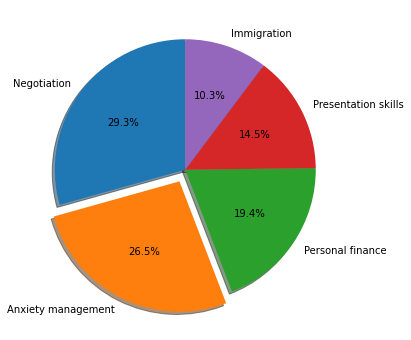

In [52]:
labels = registro['index']
explode = (0, 0.1, 0, 0,0) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(registro['Porcentagem'], explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  
;
plt.savefig('foo.png')

# Feature product_category

In [53]:
registro1 = pd.DataFrame(df['product_category'].value_counts().head(5))
registro1

,product_category
Phisical book,1298492
Podcast,216222
Workshop,36568
eBook,3955
Subscription,1970


In [68]:
registro1 = pd.DataFrame(df['product_category'].value_counts().head(5).reset_index())
freq = np.array(df['product_category'].value_counts().head(5)/ df['product_category'].value_counts().head(5).sum())
registro1['Porcentagem'] = freq *100
registro1.rename(columns = {'index':'top 5 product_category '})

,top 5 product_category,product_category,Porcentagem
0,Phisical book,1298492,83.385960
1,Podcast,216222,13.885245
2,Workshop,36568,2.348307
3,eBook,3955,0.253980
4,Subscription,1970,0.126509


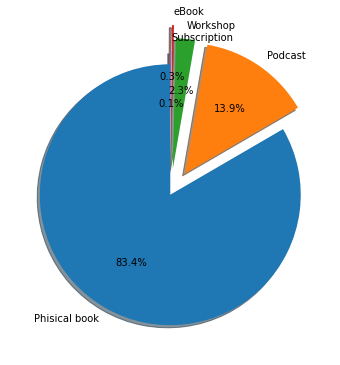

In [66]:
labels = registro1['index']
explode = (0, 0.2, 0.2, 0.3,0.1) 
fig1, ax1 = plt.subplots(figsize=(6, 6))
ax1.pie(registro1['Porcentagem'], explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)  
;
plt.savefig('foo.png')

In [71]:
df['purchase_value'].describe().round(2)

count    1561437.00
mean          -0.11
std            0.58
min           -0.54
25%           -0.46
50%           -0.36
75%            0.02
max            3.00
Name: purchase_value, dtype: float64